In [115]:
import pickle
import pandas as pd
regressor = pickle.load( open( "saved_model2", "rb" ) )
regressor


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=nan, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [116]:
grid_processed = pd.read_csv("./data/grid_processed.csv", index_col=0)

In [117]:
grid_processed['budynki_niemieszkalne_9'] = grid_processed['budynki_all_9'] - grid_processed['budynki_mieszkalne_9']
grid_processed['populacja_na_budynek_9'] = grid_processed['populacja_razem_9'] / (grid_processed['budynki_mieszkalne_9'] + 1)
grid_processed['budynki_niemieszkalne_na_populacje_9'] = grid_processed['budynki_niemieszkalne_9'] / (grid_processed['populacja_razem_9'] + 1)

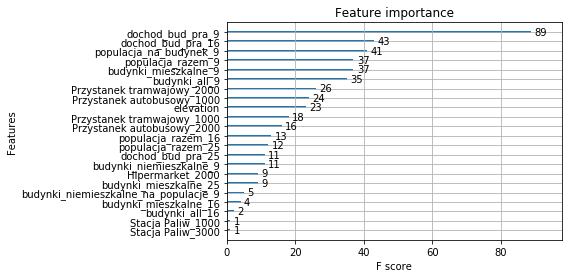

In [141]:
import xgboost as xgb
import matplotlib.pyplot as plt
xgb.plot_importance(regressor)
plt.savefig('importance.png', bbox_inches='tight',  pad_inches=1)


In [118]:
sorted([tup for tup in zip(X_grid.columns, regressor.feature_importances_)], key=lambda x: x[1])

[('budynki_all_25', 0.0),
 ('Oddział Banku_1000', 0.0),
 ('Oddział Banku_2000', 0.0),
 ('Hipermarket_1000', 0.0),
 ('Stacja Paliw_1000', 0.0021413276),
 ('Stacja Paliw_3000', 0.0021413276),
 ('budynki_all_16', 0.004282655),
 ('budynki_mieszkalne_16', 0.00856531),
 ('budynki_niemieszkalne_na_populacje_9', 0.010706638),
 ('budynki_mieszkalne_25', 0.01927195),
 ('Hipermarket_2000', 0.01927195),
 ('dochod_bud_pra_25', 0.023554605),
 ('budynki_niemieszkalne_9', 0.023554605),
 ('populacja_razem_25', 0.025695931),
 ('populacja_razem_16', 0.02783726),
 ('Przystanek autobusowy_2000', 0.03426124),
 ('Przystanek tramwajowy_1000', 0.0385439),
 ('elevation', 0.049250536),
 ('Przystanek autobusowy_1000', 0.051391862),
 ('Przystanek tramwajowy_2000', 0.05567452),
 ('budynki_all_9', 0.07494646),
 ('populacja_razem_9', 0.079229124),
 ('budynki_mieszkalne_9', 0.079229124),
 ('populacja_na_budynek_9', 0.08779443),
 ('dochod_bud_pra_16', 0.09207709),
 ('dochod_bud_pra_9', 0.19057816)]

In [120]:
center_squares = grid_processed.iloc[[83, 84, 93, 94]].copy()
suburb_squares = grid_processed.iloc[[1, 2, 11, 12]].copy()

In [121]:
suburb_squares['budynki_mieszkalne_9'] += 5
suburb_squares['budynki_all_9'] += 7
suburb_squares['populacja_razem_9'] += 900
suburb_squares['budynki_mieszkalne_16'] += 6
suburb_squares['budynki_all_16'] += 8
suburb_squares['populacja_razem_16'] += 1200
suburb_squares['budynki_mieszkalne_25'] += 8
suburb_squares['budynki_all_25'] += 11
suburb_squares['populacja_razem_25'] += 1200
suburb_squares['Przystanek autobusowy_1000'] += 3
suburb_squares['Przystanek autobusowy_2000'] += 4

In [122]:
center_squares['Przystanek tramwajowy_1000'] += 3
center_squares['Przystanek tramwajowy_2000'] += 4
center_squares['Przystanek autobusowy_1000'] -= 3
center_squares['Przystanek autobusowy_2000'] -= 4

In [129]:
changed_squares = pd.concat([suburb_squares, center_squares])
changed = changed_squares[['longitude', 'latitude']]
changed_squares = changed_squares.drop(['longitude', 'latitude'], axis=1)
changed_out = regressor.predict(changed_squares)
changed['pm1'] = changed_out
changed.to_csv('changed2.csv')

In [130]:
changed

,longitude,latitude,pm1
0,,,
1,19.854451,49.998480,25.623388
2,19.881908,49.998480,26.907488
11,19.854451,50.009434,25.780449
12,19.881908,50.009434,27.268089
83,19.909366,50.086115,34.398170
84,19.936823,50.086115,33.143787
93,19.909366,50.097070,32.361137
94,19.936823,50.097070,31.608311


In [133]:
before_change = pd.read_csv("./out2.csv", index_col=0)
before_change = before_change[['longitude', 'latitude', 'pm1']].iloc[[1, 2, 11, 12, 83, 84, 93, 94]]
before_change.to_csv("before_change2.csv")
before_change

,longitude,latitude,pm1
0,,,
1,19.854451,49.998480,25.401365
2,19.881908,49.998480,26.685465
11,19.854451,50.009434,25.659810
12,19.881908,50.009434,26.622310
83,19.909366,50.086115,34.382458
84,19.936823,50.086115,33.321545
93,19.909366,50.097070,33.143032
94,19.936823,50.097070,33.268894


In [135]:
change = changed.copy()
change['pm1'] -= before_change['pm1']
change.to_csv("change2.csv")
change

,longitude,latitude,pm1
0,,,
1,19.854451,49.998480,0.222023
2,19.881908,49.998480,0.222023
11,19.854451,50.009434,0.120639
12,19.881908,50.009434,0.645779
83,19.909366,50.086115,0.015712
84,19.936823,50.086115,-0.177758
93,19.909366,50.097070,-0.781895
94,19.936823,50.097070,-1.660583
